# Tokenization and Stemming

In [1]:
import glob
from bs4 import BeautifulSoup as bs

from nltk import word_tokenize
from nltk.stem import PorterStemmer

import matplotlib.pyplot as plt
import seaborn as sb

import pandas as pd

def tokenize_word(s):
    return [word for word in word_tokenize(s) if any(char.isalpha() or char.isdigit() for char in word)]

## Chemistry

### Extract text from XML files

In [2]:
chemistry_texts = dict()

def remove(text, tag):
    front = "<" + tag + ">"
    end = "</" + tag + ">"
    return text.replace(front, "").replace(end, "")    

# Read the XML file
for filename in glob.glob('Dataset/chemistry/*.xml'):
    all_paragraphs = list()
    with open(filename, "r") as f:
        # Read each line in the file, readlines() returns a list of lines
        content = f.read()
        content = remove(content, "sup")
        content = remove(content, "sub")
        content = remove(content, "italic")
        content = remove(content, "bold")
        soup = bs(content, 'html.parser')
        for p in soup.find_all('p'):
            paragraph = p.get_text(' ').replace('\u2009', ' ')
            all_paragraphs.append(paragraph)
    chemistry_texts[filename] = "\n".join(all_paragraphs)

### Tokenize

In [3]:
chemistry_tokens = dict()

for k, v in chemistry_texts.items():
    chemistry_tokens[k] = tokenize_word(v)

In [4]:
distinct_chemistry_tokens = set([word for token_list in chemistry_tokens.values() for word in token_list])
len(distinct_chemistry_tokens)

10181

### Stemming

In [5]:
chemistry_stems = dict()
ps = PorterStemmer()

for k, v in chemistry_tokens.items():
    chemistry_stems[k] = [ps.stem(word) for word in v]

In [6]:
distinct_chemistry_stems = set([stem for stem_list in chemistry_stems.values() for stem in stem_list])
len(distinct_chemistry_stems)

7533

### Distribution of Token Length

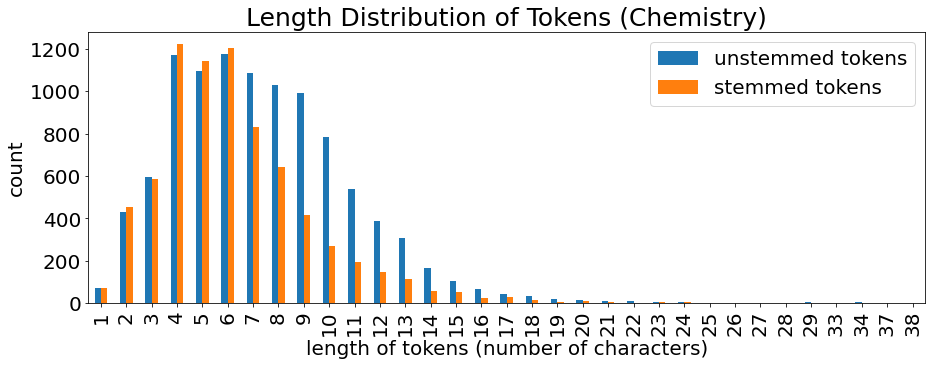

In [7]:
# chemistry_token_length = pd.Series(map(len, [word for token_list in chemistry_tokens.values() for word in token_list]))
# chemistry_stem_length = pd.Series(map(len, [stem for stem_list in chemistry_stems.values() for stem in stem_list]))
chemistry_token_length = pd.Series(map(len, distinct_chemistry_tokens))
chemistry_stem_length = pd.Series(map(len, distinct_chemistry_stems))

chemistry_lengths = pd.concat([chemistry_token_length.value_counts(), chemistry_stem_length.value_counts()], axis=1)
chemistry_lengths.columns = ['unstemmed tokens', 'stemmed tokens']

f, ax = plt.subplots(1, 1, figsize=(15, 5))
chemistry_lengths.plot(kind='bar', ax=ax)
ax.set_xlabel('length of tokens (number of characters)', fontsize=20)
ax.set_ylabel('count', fontsize=20)
ax.set_title('Length Distribution of Tokens (Chemistry)', fontsize=25)
ax.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

## Legal

### Extract text from XML files

In [8]:
legal_texts = dict()

# Read the XML files
for filename in glob.glob('Dataset/legal/*.xml'):
    with open(filename, 'r') as f:
        content = f.read()
        soup = bs(content, 'html.parser')
        legal_texts[filename] = soup.get_text()

### Tokenize

In [9]:
legal_tokens = dict()

for k, v in legal_texts.items():
    legal_tokens[k] = tokenize_word(v)

In [10]:
distinct_legal_tokens = set([word for token_list in legal_tokens.values() for word in token_list])
len(distinct_legal_tokens)

10315

### Stemming

In [11]:
legal_stems = dict()
ps = PorterStemmer()

for k, v in legal_tokens.items():
    legal_stems[k] = [ps.stem(word) for word in v]

In [12]:
distinct_legal_stems = set([stem for stem_list in legal_stems.values() for stem in stem_list])
len(distinct_legal_stems)

6833

### Distribution of Token Length

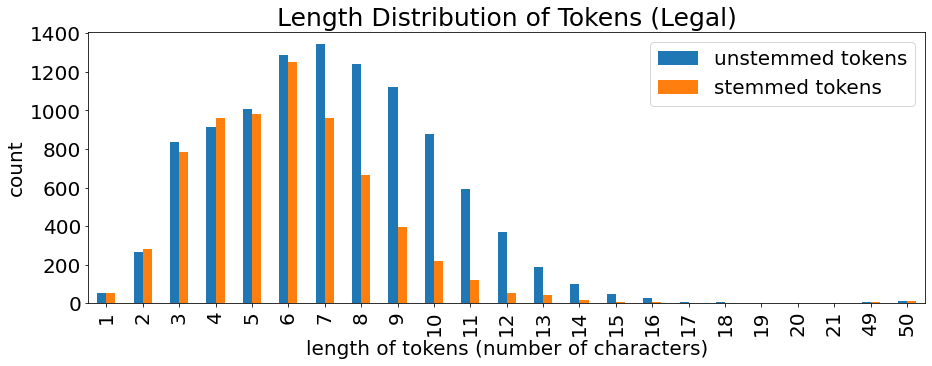

In [13]:
# legal_token_length = pd.Series(map(len, [word for token_list in legal_tokens.values() for word in token_list]))
# legal_stem_length = pd.Series(map(len, [stem for stem_list in legal_stems.values() for stem in stem_list]))
legal_token_length = pd.Series(map(len, distinct_legal_tokens))
legal_stem_length = pd.Series(map(len, distinct_legal_stems))

legal_lengths = pd.concat([legal_token_length.value_counts(), legal_stem_length.value_counts()], axis=1)
legal_lengths.columns = ['unstemmed tokens', 'stemmed tokens']

f, ax = plt.subplots(1, 1, figsize=(15, 5))
legal_lengths.plot(kind='bar', ax=ax)
ax.set_xlabel('length of tokens (number of characters)', fontsize=20)
ax.set_ylabel('count', fontsize=20)
ax.set_title('Length Distribution of Tokens (Legal)', fontsize=25)
ax.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

## Sports

### Extract text from TXT files

In [14]:
with open('Dataset/sports.txt', 'r', encoding='utf-8') as f:
    sports_texts = f.read()

### Tokenize

In [15]:
sports_tokens = tokenize_word(sports_texts)

In [16]:
distinct_sports_tokens = set(sports_tokens)
len(distinct_sports_tokens)

8254

### Stemming

In [17]:
ps = PorterStemmer()
sports_stems = [ps.stem(word) for word in sports_tokens]

In [18]:
distinct_sports_stems = set(sports_stems)
len(distinct_sports_stems)

6186

### Distribution of Token Length

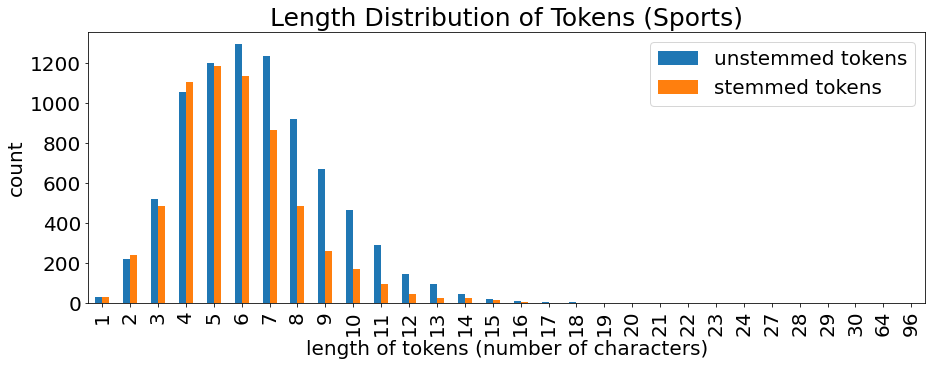

In [19]:
# sports_token_length = pd.Series(map(len, sports_tokens))
# sports_stem_length = pd.Series(map(len, sports_stems))
sports_token_length = pd.Series(map(len, distinct_sports_tokens))
sports_stem_length = pd.Series(map(len, distinct_sports_stems))

sports_lengths = pd.concat([sports_token_length.value_counts(), sports_stem_length.value_counts()], axis=1)
sports_lengths.columns = ['unstemmed tokens', 'stemmed tokens']

f, ax = plt.subplots(1, 1, figsize=(15, 5))
sports_lengths.plot(kind='bar', ax=ax)
ax.set_xlabel('length of tokens (number of characters)', fontsize=20)
ax.set_ylabel('count', fontsize=20)
ax.set_title('Length Distribution of Tokens (Sports)', fontsize=25)
ax.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()